In [1]:
#Import Matplotlib dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#Import numpy, pandas, and datetime
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite, which allows to connect to the sqlite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#creates a base to see the content of the sqlite
Base = automap_base()

# Use Base to reflect the tables into classes
Base.prepare(engine)

In [6]:
#See the classes mapped to the Base
Base.classes.keys

<bound method Properties.keys of <sqlalchemy.util._collections.Properties object at 0x12c6f99f0>>

In [7]:
#Assign the measurement and station classes to variables of the same name
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
#Creating a sqlalchemy session in order to link Python to the database
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#Most recent date
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

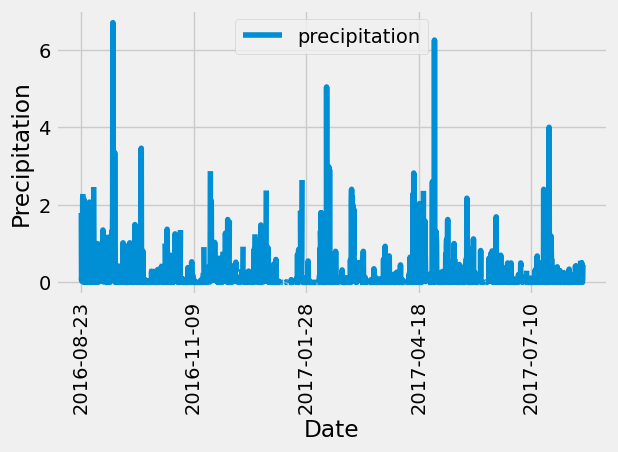

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

#Previous year from most recent date
previous_year = dt.date(2017,8,23) - dt.timedelta(days=365)

#Get the date and precipitation data for the previous year
#Filter appears to replace the sql 'where' statement 
#and the session.query appears to replace the sql select
scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()

#Put the above scores query into a pandas dataframe with the columns date and precipitation
df = pd.DataFrame(scores, columns=("date", "precipitation"))

#Sort by date and output the dataframe for confirmation
df = df.sort_values("date")
df

#Visualize the data using pandas with df.plot and plt as matplotlib
df.plot(x='date', y='precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.tight_layout()
plt.show()

In [11]:
#Show the summary stats for the dataframe with pandas
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
#Get the total number of stations
session.query(func.count(Station.station)).all()

[(9,)]

In [13]:
#Get the most active stations (stations with the most rows)
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
#Find highest, lowest, and average temperatures from the USC00519281 station as it has the most observations
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

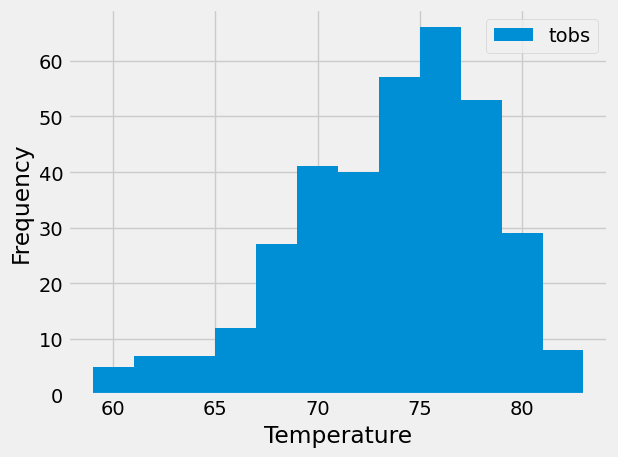

In [18]:
#Get the previous 12 months of TOBS data for the station with the most observations

#Previous year from most recent date
previous_year = dt.date(2017,8,23) - dt.timedelta(days=365)

#Create a session and filter for the station with the most observations and for the past 12 months
tobs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= previous_year).all()

#Take the data and put into a datafame and visualize using .hist
df = pd.DataFrame(tobs, columns=['tobs'])
df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.tight_layout()
plt.show()

# Close Session

In [17]:
# Close Session
session.close()